In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [87]:
df = pd.read_csv("advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [88]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [89]:
# lets drop the extra column "unnamed"
df.drop(columns='Unnamed: 0',inplace=True)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [91]:
df['TV'].value_counts()

199.8    2
109.8    2
17.2     2
177.0    2
222.4    2
        ..
139.3    1
216.8    1
199.1    1
26.8     1
232.1    1
Name: TV, Length: 190, dtype: int64

In [92]:
df['radio'].value_counts()

4.1     3
5.7     3
13.9    2
14.3    2
36.9    2
       ..
42.8    1
14.5    1
30.6    1
33.0    1
8.6     1
Name: radio, Length: 167, dtype: int64

In [93]:
# As such there is no Missing value in the dataset 
# And there is no Categorcal Column,
# so that we can comapare it with the numeric one to find the Outliers 
# So will look for the skewness

In [94]:
# lets select the Numercic Features
colname = df.select_dtypes(['float64']).columns
colname

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [95]:
df[colname]
# df[['TV','radio','newspaper',sales]]

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [96]:
from scipy.stats import skew

In [97]:
skew(df['TV'])

-0.06932836662244649

In [98]:
np.sqrt(-0.0693283)

nan

In [99]:
np.log(-0.069328)

nan

TV
-0.06932836662244649


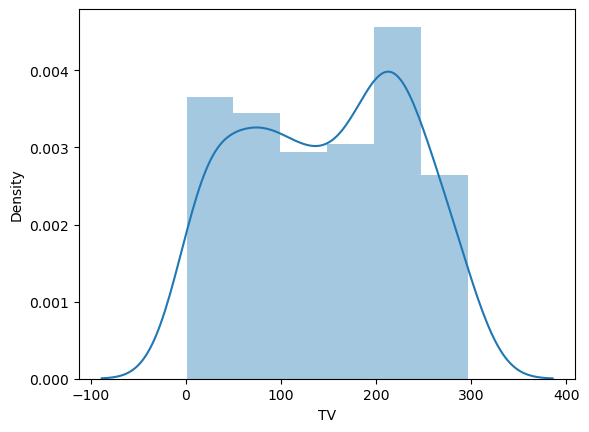

radio
0.0934668451108453


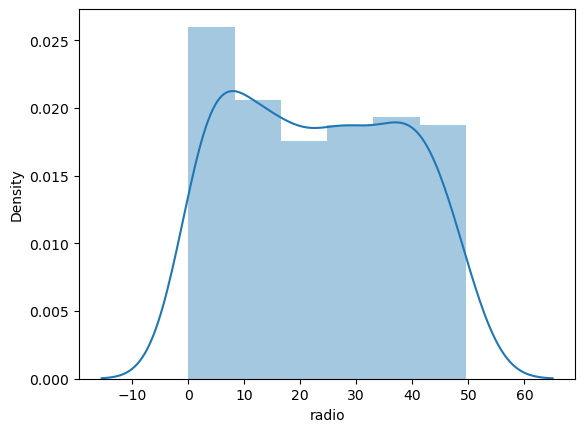

newspaper
0.8879959753085498


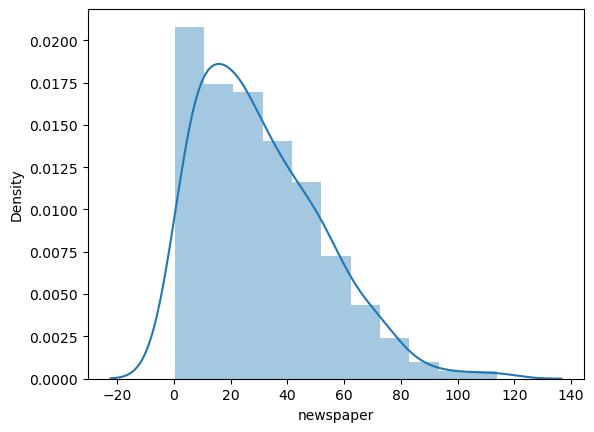

sales
0.4045082487061191


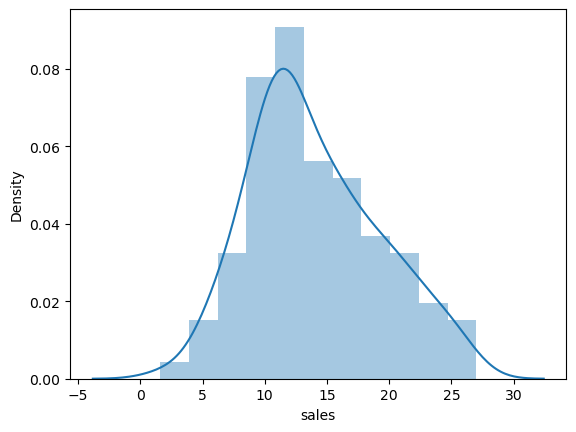

In [100]:
for col in df[colname]:
    print(col)
    print(skew(df[col]))
    sns.distplot(df[col])
    plt.show()

In [101]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [102]:
skew(df['newspaper'])

0.8879959753085498

In [103]:
# 0.228299 it is the correlation value of Newspaper

In [104]:
#In this case,
#Skewness value is not close to Zero and Correlation value is not close to One.

In [105]:
# lets remove the skew value of Newpapaer Using sqrt
df['newspaper'] = np.sqrt(df['newspaper'])
skew(df['newspaper'])

0.061918832707862255

In [106]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.045976,0.782224
radio,0.054809,1.000000,0.313430,0.576223
newspaper,0.045976,0.313430,1.000000,0.204725
sales,0.782224,0.576223,0.204725,1.000000


## lets perform some Visualization 

# scatter plot

In [107]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,8.318654,22.1
1,44.5,39.3,6.715653,10.4
2,17.2,45.9,8.324662,9.3
3,151.5,41.3,7.648529,18.5
4,180.8,10.8,7.641989,12.9
...,...,...,...,...
195,38.2,3.7,3.714835,7.6
196,94.2,4.9,2.846050,9.7
197,177.0,9.3,2.529822,12.8
198,283.6,42.0,8.136338,25.5


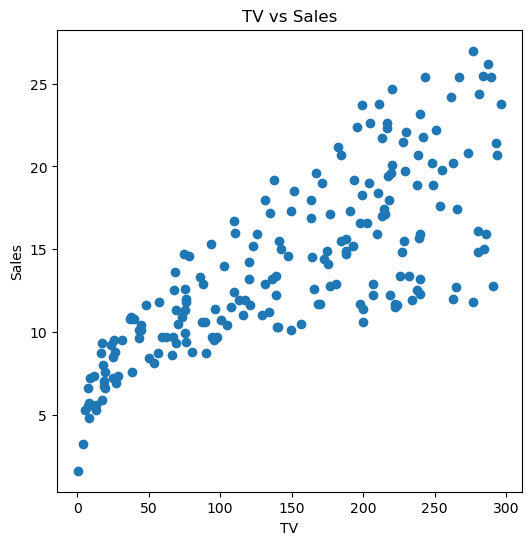

In [108]:
plt.figure(figsize=(6,6))
plt.scatter(x = df['TV'],y = df['sales'])
plt.title('TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

    From the above observation we got to know that there is
    positive correlation between TV and Sales 
    That as the TV advertisement is increasing the sales 
    are also increasing

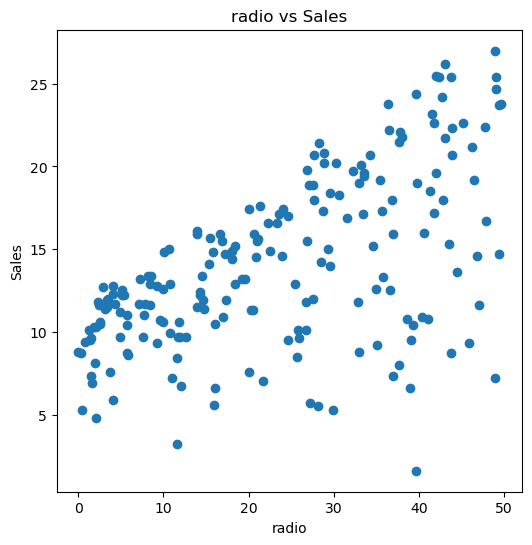

In [109]:
# lets compare with another variables 
plt.figure(figsize=(6,6))
plt.scatter(x = df['radio'],y = df['sales'])
plt.title('radio vs Sales')
plt.xlabel('radio')
plt.ylabel('Sales')
plt.show()

    From the above observation we got to know that there is
    positive correlation between radio and Sales 
    That as the radio advertisement is increasing the sales 
    are also increasing

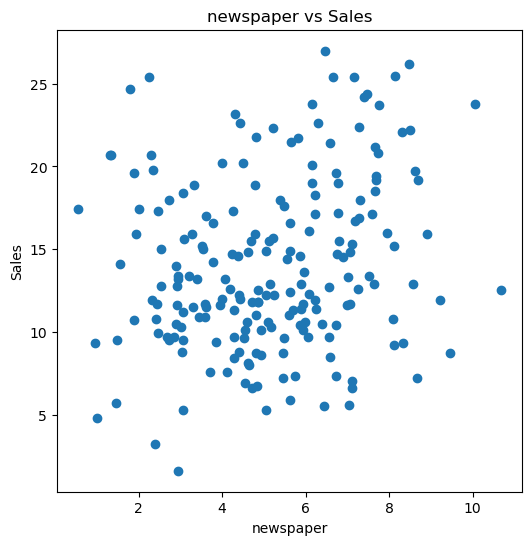

In [110]:
# lets compare with another variables 
plt.figure(figsize=(6,6))
plt.scatter(x = df['newspaper'],y = df['sales'])
plt.title('newspaper vs Sales')
plt.xlabel('newspaper')
plt.ylabel('Sales')
plt.show()

    The Above scatter plot is between newspaper and sales,
    where it says that there is a relationship which is
    totally neutrally scattered which doesnt make sense like
    where you cant specifically tell that it is positive or -ve.

## lets Perform Linear Regression on Advertising Dataset.

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [112]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,8.318654,22.1
1,44.5,39.3,6.715653,10.4
2,17.2,45.9,8.324662,9.3
3,151.5,41.3,7.648529,18.5
4,180.8,10.8,7.641989,12.9
...,...,...,...,...
195,38.2,3.7,3.714835,7.6
196,94.2,4.9,2.846050,9.7
197,177.0,9.3,2.529822,12.8
198,283.6,42.0,8.136338,25.5


# Goal :- To find the BestFit Line Of The Data using formula y = mx+c

In [113]:
df['TV'].mean()

147.0425

In [114]:
df['sales'].mean()

14.022500000000003

In [115]:
x_tvmean = df['TV'].mean()
y_sales_mean = df['sales'].mean()

In [116]:
x_tvmean

147.0425

In [117]:
y_sales_mean

14.022500000000003

In [118]:
# to find the best fit line 
# the formula is y = mx+c
# y = dependent variable
# x = independent variable
# m = slope/gradient/weight/co-efficient of Regression
# c = intercept


# first lets find m 
m = sum((df['TV']-x_tvmean)*(df['sales']-y_sales_mean))/sum((df['TV']-x_tvmean)**2)

print(f"Coefficient Of Regression :- {m}")

Coefficient Of Regression :- 0.04753664043301969


In [119]:
#ymean = xmean*m + c
# y = mx + c
c = y_sales_mean - (m*x_tvmean)

print(f"The Intercept of Regssion Line:- {c}")

The Intercept of Regssion Line:- 7.032593549127705


In [120]:
def linreg(x):
    return (m*x+c)

In [121]:
ypred = df['TV'].apply(linreg)

In [122]:
df.loc[:,['TV','sales']]

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [135]:
ypred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Name: TV, Length: 200, dtype: float64

In [124]:
dic = {
    "X_TV":df['TV'],
    "Actual Y_Sales":df['sales'],
    "Predicted Y_Sales":ypred
    
    
}

df = pd.DataFrame(dic)
df

,X_TV,Actual Y_Sales,Predicted Y_Sales
0,230.1,22.1,17.970775
1,44.5,10.4,9.147974
2,17.2,9.3,7.850224
3,151.5,18.5,14.234395
4,180.8,12.9,15.627218
...,...,...,...
195,38.2,7.6,8.848493
196,94.2,9.7,11.510545
197,177.0,12.8,15.446579
198,283.6,25.5,20.513985


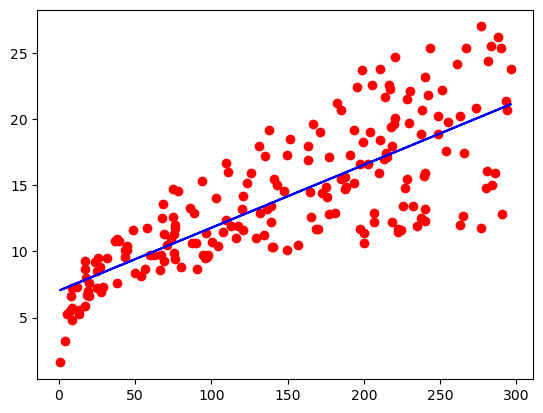

In [125]:
plt.scatter(df['X_TV'],df['Actual Y_Sales'],color="red")
plt.plot(df['X_TV'],df['Predicted Y_Sales'],color="blue")
plt.show()

## MAE (Mean Absolute Error)

In [126]:
sum(abs(df['Actual Y_Sales']-ypred))/len(df['X_TV'])

2.549806038927486

## MSE (Mean Squared Error)

In [127]:
sum((df['Actual Y_Sales']-ypred)**2)/len(df['X_TV'])

10.512652915656759

## RMSE (Root Mean Sqaured Error)

In [129]:
np.sqrt(10.5126)

3.2423139884964876

In [128]:
np.sqrt(sum((df['Actual Y_Sales']-ypred)**2)/len(df['X_TV']))

3.2423221486546887

In [130]:
r2 = sum((ypred-df['Actual Y_Sales'].mean())**2)/sum((df['Actual Y_Sales']-df['Actual Y_Sales'].mean())**2)

print(f"The Accuracy Of This Model is :- {r2}")

The Accuracy Of This Model is :- 0.6118750508500697


In [ ]:
# So, here it shows 61% of Accuracy for the Model.

## New Observation

In [132]:
linreg(44.6)

9.152727712440385